# Proyecto de Base de Datos NoSQL con MongoDB

Este notebook contiene una guía paso a paso para trabajar con MongoDB creando una base de datos NoSQL orientada a documentos, para almacenar y analizar datos de observaciones astronómicas. 

Para un proyecto de datos astronómicos `MongoDB` es una buena opción, si el enfoque es almacenar datos detallados de observaciones con variedad en las estructuras (por ejemplo, observaciones con diferentes atributos)

## Paso 1: Preparar el Entorno

En este proyecto, he optado por **MongoDB local** para realizar las pruebas y conexiones. A continuación, se describen ambas formas de trabajo: **MongoDB local** y **MongoDB Atlas**.

### 1.1 **Instalar MongoDB**

#### Opción 1: **MongoDB Local**
- Descargar desde la [página oficial de MongoDB](https://www.mongodb.com/try/download/community).
- Una vez descargado MongoDB, seguir las instrucciones detalladas de instalación proporcionadas en la página oficial.
- Durante la instalación, configuré MongoDB para que se ejecute como un servicio en segundo plano, asegurándome de que el servidor MongoDB estuviera activo y en ejecución localmente en el puerto predeterminado `27017`.
- Iniciar MongoDB como un servicio: Una vez instalado, puedes iniciar MongoDB como un servicio con el siguiente comando:
   ```bash
   brew services start mongodb/brew/mongodb-community

#### Opción 2: **MongoDB Atlas (Uso en Línea)**
- Registrarse en [MongoDB Atlas](https://www.mongodb.com/atlas).
- MongoDB Atlas permite crear un clúster de bases de datos virtuales, administrar y conectar aplicaciones sin tener que preocuparse por la infraestructura.
- Si decides utilizar MongoDB Atlas, necesitarás crear una cuenta y generar una URI de conexión para conectarte a tu base de datos en la nube.

---
### 1.2 **Instalar la librería `pymongo` para Python**


Para interactuar con MongoDB desde Python, es necesario instalar la librería `pymongo`. Esta biblioteca permite conectar, consultar, insertar, actualizar y eliminar documentos en MongoDB.

1. Abrir una terminal en tu sistema **(Yo preferí instalar la librería directamente desde una celda de Jupyter, usando el magic command `%pip` para instalar pymongo)**
2. Instala la librería utilizando el siguiente comando:
   ```bash
   pip install pymongo
   ```



In [27]:
%pip install pymongo
import pymongo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
# Conectar a MongoDB
from pymongo import MongoClient

# Conexión local a MongoDB (por defecto)
client = MongoClient('mongodb://localhost:27017/')

# Para Atlas
# client = MongoClient("mongodb+srv://<usuario>:<contraseña>@cluster0.mongodb.net/<nombre_base_datos>?retryWrites=true&w=majority")

# Crear base de datos y colección
db = client['astronomia'] # Base de datos
coleccion = db['observaciones'] # Colección

print("Bases de datos disponibles:", client.list_database_names())

Bases de datos disponibles: ['admin', 'config', 'local']


In [18]:
# Eliminar la base de datos 'astronomia' si existe
client.drop_database('astronomia')

# Verificar las bases de datos después de la eliminación
print("Bases de datos actuales:", client.list_database_names())

Bases de datos actuales: ['admin', 'config', 'local']


## Paso 2: Crear e Insertar Datos Ficticios

En este paso, se ingresan datos ficticios correspondientes a observaciones astronómicas, aunque también es posible utilizar datos reales de observación. Estos datos se almacenan posteriormente en una base de datos NoSQL. En este caso, se insertan al menos 5 registros que representan información relevante en el contexto de una observación astronómica.


In [29]:
# Datos ficticios con objetos diferentes a galaxias
datos_observaciones = [
    {'nombre_objeto': 'Andrómeda', 'tipo_objeto': 'galaxia', 'intensidad': 50, 'longitud_onda': 450, 'fecha_observacion': '2024-01-01'},
    {'nombre_objeto': 'Vía Láctea', 'tipo_objeto': 'galaxia', 'intensidad': 70, 'longitud_onda': 500, 'fecha_observacion': '2024-02-01'},
    {'nombre_objeto': 'Messier 82', 'tipo_objeto': 'galaxia', 'intensidad': 30, 'longitud_onda': 400, 'fecha_observacion': '2024-03-01'},
    {'nombre_objeto': 'Galaxia del Triángulo', 'tipo_objeto': 'galaxia', 'intensidad': 65, 'longitud_onda': 480, 'fecha_observacion': '2024-04-01'},
    {'nombre_objeto': 'NGC 1300', 'tipo_objeto': 'galaxia', 'intensidad': 90, 'longitud_onda': 470, 'fecha_observacion': '2024-05-01'},
    {'nombre_objeto': 'Sirio', 'tipo_objeto': 'estrella', 'intensidad': 110, 'longitud_onda': 600, 'fecha_observacion': '2024-06-01'},
    {'nombre_objeto': 'Nebulosa de Orión', 'tipo_objeto': 'nebulosa', 'intensidad': 80, 'longitud_onda': 650, 'fecha_observacion': '2024-07-01'},
    {'nombre_objeto': 'Betelgeuse', 'tipo_objeto': 'estrella', 'intensidad': 120, 'longitud_onda': 700, 'fecha_observacion': '2024-08-01'},
    {'nombre_objeto': 'NGC 2244', 'tipo_objeto': 'cúmulo estelar', 'intensidad': 60, 'longitud_onda': 550, 'fecha_observacion': '2024-09-01'},
    {'nombre_objeto': 'Nebulosa del Cangrejo', 'tipo_objeto': 'nebulosa', 'intensidad': 100, 'longitud_onda': 675, 'fecha_observacion': '2024-10-01'}
]

# Insertar los datos en la colección
coleccion.insert_many(datos_observaciones) 

print('Datos insertados con éxito.')

print("Bases de datos disponibles:", client.list_database_names())
print("Colecciones en 'astronomia':", db.list_collection_names())

Datos insertados con éxito.
Bases de datos disponibles: ['admin', 'astronomia', 'config', 'local']
Colecciones en 'astronomia': ['observaciones']


# Paso 3: Realizar Consultas Básicas

Una vez que hemos insertado los datos en la base de datos, podemos realizar consultas básicas para recuperar la información de nuestras observaciones astronómicas. A continuación, se muestran algunos ejemplos de cómo utilizar el método `find()` en MongoDB para explorar y filtrar los datos.


### 3.1. Consulta simple para recuperar todas las observaciones

In [ ]:
for observacion in coleccion.find(): 
    print(observacion) 

{'_id': ObjectId('6735ccf7fac7fdbfe875337e'), 'nombre_objeto': 'Andrómeda', 'tipo_objeto': 'galaxia', 'intensidad': 50, 'longitud_onda': 450, 'fecha_observacion': '2024-01-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe875337f'), 'nombre_objeto': 'Vía Láctea', 'tipo_objeto': 'galaxia', 'intensidad': 70, 'longitud_onda': 500, 'fecha_observacion': '2024-02-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753380'), 'nombre_objeto': 'Messier 82', 'tipo_objeto': 'galaxia', 'intensidad': 30, 'longitud_onda': 400, 'fecha_observacion': '2024-03-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753381'), 'nombre_objeto': 'Galaxia del Triángulo', 'tipo_objeto': 'galaxia', 'intensidad': 65, 'longitud_onda': 480, 'fecha_observacion': '2024-04-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753382'), 'nombre_objeto': 'NGC 1300', 'tipo_objeto': 'galaxia', 'intensidad': 90, 'longitud_onda': 470, 'fecha_observacion': '2024-05-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753383'), 'nombre_objeto': 'Sirio', 'tipo_objeto': 'estrella', 'in

### 3.2. Consulta simple para filtrar solo las galaxias

In [ ]:
galaxias = coleccion.find({'tipo_objeto': 'galaxia' })
for galaxia in galaxias:
    print(galaxia)


{'_id': ObjectId('6735ccf7fac7fdbfe875337e'), 'nombre_objeto': 'Andrómeda', 'tipo_objeto': 'galaxia', 'intensidad': 50, 'longitud_onda': 450, 'fecha_observacion': '2024-01-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe875337f'), 'nombre_objeto': 'Vía Láctea', 'tipo_objeto': 'galaxia', 'intensidad': 70, 'longitud_onda': 500, 'fecha_observacion': '2024-02-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753380'), 'nombre_objeto': 'Messier 82', 'tipo_objeto': 'galaxia', 'intensidad': 30, 'longitud_onda': 400, 'fecha_observacion': '2024-03-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753381'), 'nombre_objeto': 'Galaxia del Triángulo', 'tipo_objeto': 'galaxia', 'intensidad': 65, 'longitud_onda': 480, 'fecha_observacion': '2024-04-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753382'), 'nombre_objeto': 'NGC 1300', 'tipo_objeto': 'galaxia', 'intensidad': 90, 'longitud_onda': 470, 'fecha_observacion': '2024-05-01'}


### 3.3. Obtener tipos de objetos únicos

Si queremos obtener los tipos de objetos observados (por ejemplo, galaxias, estrellas, cúmulos), podemos utilizar el método `distinct()` para obtener los valores únicos del campo `tipo_objeto`.


In [ ]:
tipos_objetos = coleccion.distinct('tipo_objeto')
print("Tipos de objetos:", tipos_objetos)

## Paso 4: Realizar Consultas Avanzadas

En esta sección, vamos a realizar consultas más avanzadas, como por ejemplo buscar la observación con la mayor y menor intensidad, filtrar las observaciones dada cierta condición, y consultar observaciones en un rango de fechas específico.

### 4.1. Obtener la observación con mayor y menor intensidad

Para encontrar la observación con la mayor y menor intensidad, utilizamos el método `find_one()` junto con el parámetro `sort` para ordenar los documentos de acuerdo a la intensidad de manera descendente y ascendente, respectivamente.

In [ ]:
mayor_intensidad = coleccion.find_one(sort=[('intensidad', -1)])
print('Observación con mayor intensidad:', mayor_intensidad)

Observación con mayor intensidad: {'_id': ObjectId('6735ccf7fac7fdbfe8753385'), 'nombre_objeto': 'Betelgeuse', 'tipo_objeto': 'estrella', 'intensidad': 120, 'longitud_onda': 700, 'fecha_observacion': '2024-08-01'}


In [36]:
menor_intensidad = coleccion.find_one(sort=[('intensidad', 1)])
print('Observación con menor intensidad:', menor_intensidad)

Observación con menor intensidad: {'_id': ObjectId('6735ccf7fac7fdbfe8753380'), 'nombre_objeto': 'Messier 82', 'tipo_objeto': 'galaxia', 'intensidad': 30, 'longitud_onda': 400, 'fecha_observacion': '2024-03-01'}


### 4.2. Filtrar observaciones con intensidad mayor a 70

Si queremos obtener todas las observaciones con una intensidad mayor a 70, usamos el operador `$gt` (mayor que) para realizar el filtro:


In [ ]:
intensidad_mayor_70= coleccion.find({'intensidad': {'$gt': 70}})
for observacion in intensidad_mayor_70:
    print(observacion)

{'_id': ObjectId('6735ccf7fac7fdbfe8753382'), 'nombre_objeto': 'NGC 1300', 'tipo_objeto': 'galaxia', 'intensidad': 90, 'longitud_onda': 470, 'fecha_observacion': '2024-05-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753383'), 'nombre_objeto': 'Sirio', 'tipo_objeto': 'estrella', 'intensidad': 110, 'longitud_onda': 600, 'fecha_observacion': '2024-06-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753384'), 'nombre_objeto': 'Nebulosa de Orión', 'tipo_objeto': 'nebulosa', 'intensidad': 80, 'longitud_onda': 650, 'fecha_observacion': '2024-07-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753385'), 'nombre_objeto': 'Betelgeuse', 'tipo_objeto': 'estrella', 'intensidad': 120, 'longitud_onda': 700, 'fecha_observacion': '2024-08-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753387'), 'nombre_objeto': 'Nebulosa del Cangrejo', 'tipo_objeto': 'nebulosa', 'intensidad': 100, 'longitud_onda': 675, 'fecha_observacion': '2024-10-01'}


### 4.3. Consultar observaciones dentro de un rango de fechas
Para realizar una consulta de observaciones que ocurrieron dentro de un rango de fechas, utilizamos los operadores `$gte` (mayor o igual que) y `$lte` (menor o igual que) en el campo `fecha_observacion`:

In [ ]:
fecha_inicio = '2024-02-01'
fecha_fin = '2024-04-30'
rango_fechas = coleccion.find({'fecha_observacion': {'$gte': fecha_inicio, '$lte': fecha_fin}})
for observacion in rango_fechas:
    print(observacion)

{'_id': ObjectId('6735ccf7fac7fdbfe875337f'), 'nombre_objeto': 'Vía Láctea', 'tipo_objeto': 'galaxia', 'intensidad': 70, 'longitud_onda': 500, 'fecha_observacion': '2024-02-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753380'), 'nombre_objeto': 'Messier 82', 'tipo_objeto': 'galaxia', 'intensidad': 30, 'longitud_onda': 400, 'fecha_observacion': '2024-03-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753381'), 'nombre_objeto': 'Galaxia del Triángulo', 'tipo_objeto': 'galaxia', 'intensidad': 65, 'longitud_onda': 480, 'fecha_observacion': '2024-04-01'}


### 4.4. Consulta combinada para obtener solo las galaxias con una longitud de onda mayor a 400
En este paso, realizamos una consulta combinada que filtra observaciones de galaxias con una longitud de onda mayor a 400. Para ello, utilizamos el operador `$gt` (mayor que) para especificar el valor mínimo de la longitud de onda y combinamos este filtro con el campo `tipo_objeto` para que solo se seleccionen las observaciones que corresponden a galaxias.

In [41]:
galaxias_longitud_onda_mayor_500 = coleccion.find({'tipo_objeto': 'galaxia', 'longitud_onda': {'$gt': 400}})
for galaxia in galaxias_longitud_onda_mayor_500:
    print(galaxia)

{'_id': ObjectId('6735ccf7fac7fdbfe875337e'), 'nombre_objeto': 'Andrómeda', 'tipo_objeto': 'galaxia', 'intensidad': 50, 'longitud_onda': 450, 'fecha_observacion': '2024-01-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe875337f'), 'nombre_objeto': 'Vía Láctea', 'tipo_objeto': 'galaxia', 'intensidad': 70, 'longitud_onda': 500, 'fecha_observacion': '2024-02-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753381'), 'nombre_objeto': 'Galaxia del Triángulo', 'tipo_objeto': 'galaxia', 'intensidad': 65, 'longitud_onda': 480, 'fecha_observacion': '2024-04-01'}
{'_id': ObjectId('6735ccf7fac7fdbfe8753382'), 'nombre_objeto': 'NGC 1300', 'tipo_objeto': 'galaxia', 'intensidad': 90, 'longitud_onda': 470, 'fecha_observacion': '2024-05-01'}


## Paso 5: Visualización de Datos

La visualización de los datos es una herramienta poderosa para identificar patrones, tendencias y relaciones clave en las observaciones astronómicas. En este paso, utilizaremos bibliotecas como `Matplotlib` y `Seaborn` para generar gráficos que nos permitan explorar las relaciones entre diferentes variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 5.1. **Intensidad Promedio por Longitud de Onda**:
Un gráfico de línea que muestra cómo varía la intensidad promedio en función de la longitud de onda.

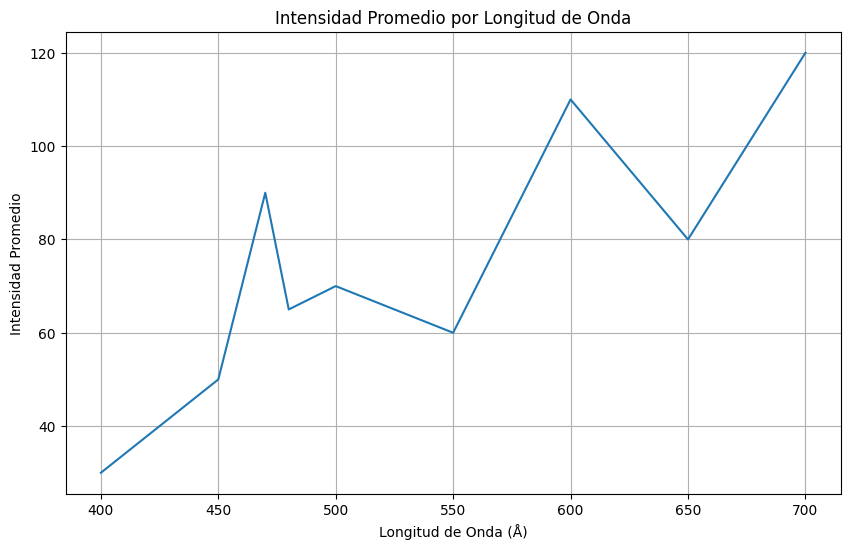

In [47]:
# Obtener los datos desde MongoDB
observaciones = list(coleccion.find({}))

# Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(observaciones)

# Calcular la intensidad promedio por longitud de onda
intensidad_promedio = df.groupby('longitud_onda')['intensidad'].mean().reset_index()

# Crear la visualización
plt.figure(figsize=(10, 6))
sns.lineplot(x='longitud_onda', y='intensidad', data=intensidad_promedio)
plt.title('Intensidad Promedio por Longitud de Onda')
plt.xlabel('Longitud de Onda (Å)')
plt.ylabel('Intensidad Promedio')
plt.grid(True)
plt.show()



### 5.2. **Frecuencia de Observación por Tipo de Objeto Astronómico**: 
Un gráfico de barras que nos permite ver cuántas observaciones se han realizado para cada tipo de objeto astronómico, como galaxias, estrellas, cúmulos, etc. Esto proporciona una idea de la distribución de los objetos observados.

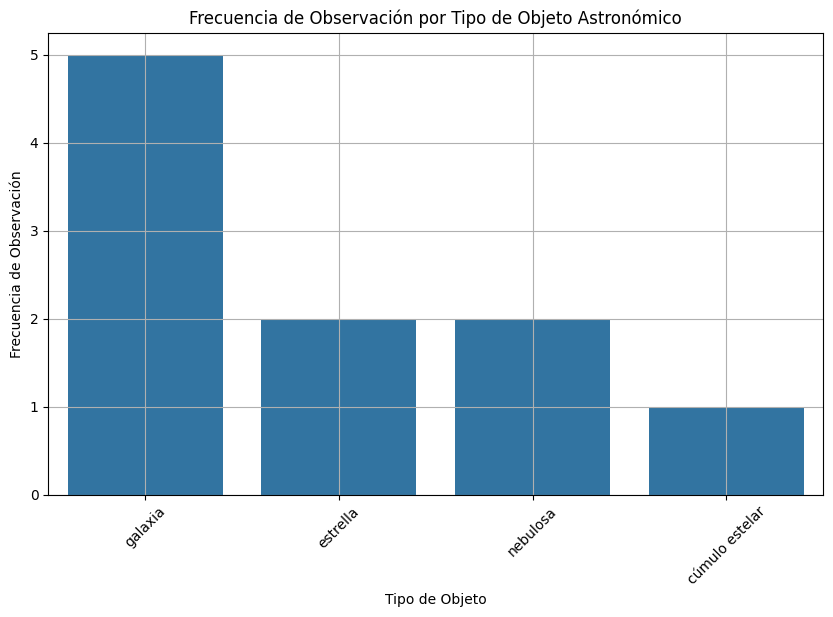

In [44]:
# Contar la frecuencia de cada tipo de objeto
frecuencia_tipo_objeto = df['tipo_objeto'].value_counts().reset_index()
frecuencia_tipo_objeto.columns = ['Tipo de Objeto', 'Frecuencia']

# Crear la visualización
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipo de Objeto', y='Frecuencia', data=frecuencia_tipo_objeto)
plt.title('Frecuencia de Observación por Tipo de Objeto Astronómico')
plt.xlabel('Tipo de Objeto')
plt.ylabel('Frecuencia de Observación')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Paso 6: Conclusión y Reflexión

### Uso de MongoDB frente a Bases de Datos Relacionales para Datos Científicos

MongoDB, al ser una base de datos NoSQL, se destaca por su flexibilidad y escalabilidad en el manejo de grandes volúmenes de datos no estructurados. En comparación con las bases de datos relacionales, que requieren esquemas fijos y tablas predefinidas, MongoDB permite almacenar datos de manera más libre, adaptándose a cambios en la estructura sin grandes complicaciones. Esto resulta especialmente útil en el análisis de datos astronómicos, donde los datos pueden tener variaciones significativas en su formato, como las observaciones de diferentes telescopios, longitudes de onda y tipos de objetos astronómicos.

#### Escenarios en los que MongoDB es una Mejor Elección

1. **Datos No Estructurados o Semi-Estructurados**: En el caso de datos astronómicos, donde las observaciones pueden variar en formato o tener atributos adicionales en diferentes experimentos o misiones, MongoDB permite manejar estos datos de manera más eficiente que una base de datos relacional.
   
2. **Escalabilidad y Manejo de Grandes Volúmenes de Datos**: MongoDB es adecuado cuando se necesitan manejar grandes volúmenes de datos provenientes de telescopios, satélites y otros instrumentos. Su capacidad para distribuir los datos entre múltiples servidores facilita su gestión a medida que aumentan los volúmenes de datos.
   
3. **Flexibilidad en la Consulta de Datos**: MongoDB facilita la consulta y agregación de datos complejos, lo que es ventajoso cuando se trabaja con observaciones de diferentes tipos de objetos astronómicos o cuando los atributos pueden cambiar con el tiempo.

### La Importancia de la Visualización de Datos en la Interpretación de Información

La visualización de datos es crucial para interpretar información compleja de manera accesible y significativa. A través de gráficos y representaciones visuales, podemos detectar patrones, identificar tendencias y comprender mejor las relaciones entre distintas variables. En el contexto de datos astronómicos, la visualización permite a los investigadores:

1. **Identificar Tendencias**: Las visualizaciones pueden mostrar cómo cambian las observaciones en función de parámetros como la longitud de onda, la intensidad o el tiempo.
   
2. **Detectar Anomalías**: Los gráficos pueden hacer que las anomalías en los datos sean más fáciles de identificar, como observaciones atípicas o errores en los datos.

3. **Tomar Decisiones Informadas**: Al ver los datos de manera gráfica, los astrónomos pueden tomar decisiones más informadas sobre qué áreas de estudio explorar o qué observaciones podrían ser más relevantes para sus investigaciones.

En resumen, la visualización de datos ayuda a transformar los datos crudos en información comprensible y procesable, facilitando la interpretación y análisis de los mismos en el contexto de la astronomía y otras ciencias.
